## Driver file to show-case GLCM(Gray Level Co-occurance Matrix) functions written in utility.py
These functions are defined in utility
- **construct_glcm**
    - Used to generate glcm from image
        - Params list: 
          - img: image or matrix to construct glcm from
          - gray_levels: for grayscale image it will be 256
          - d: distance, example: 1, 2, 5
          - theta: angle, example: 0, 45, 90
          - symmetric: meaning if the result will be symmetic
          - normalized: meaning if the result needs to be normalized
- Feature utility functions
    - **energy**: To compute energy
    - **contrast**: To compute contrast
    - **correlation**: To calculate correlation
    - **entropy**: To calculate entropy
    - **IDM**: To calculate homogenity
    - **mean**, **sigma**, **sum**: Good ol' statistical features


 **Note:** Most of Feature functions take glcm as single argument

In [1]:
import numpy as np
import imageio.v3 as io
import matplotlib.pyplot as plt

In [2]:
from utility import construct_glcm, energy, contrast, correlation, entropy, IDM, mean, sigma, sum

In [3]:
from skimage.feature import graycomatrix, graycoprops

#### This matrix is taken from the lecture slides

In [4]:
slides_matrix = np.array([[0,0,1,1], [0,0,1,1],[0,2,2,2],[2,2,3,3]])

In [5]:
glcm = construct_glcm(slides_matrix, 4, 1, 0, symmetric=True, normalized=True)

### Find features using our own implemented functions

In [6]:
print("Energy: ", energy(glcm), "\nIDM: ", IDM(glcm), "\nCorrelation: ", correlation(glcm), "\nContrast: ", contrast(glcm), "\nEntropy: ", entropy(glcm) ) 

Energy:  0.14583333333333331 
IDM:  0.8083333333333335 
Correlation:  0.719532554257095 
Contrast:  0.5833333333333333 
Entropy:  2.0947290475276485


### Find features using standard sklearn functions

In [7]:
glcm_sk = graycomatrix(
        slides_matrix, distances=[1], angles=[0], levels=256, symmetric=True, normed=True
    )
print("Energy: ", graycoprops(glcm_sk, 'energy'), " (sklearn implements a slightly different definition of energy)\nIDM: ", graycoprops(glcm_sk, 'homogeneity'), "\nCorrelation: ", graycoprops(glcm_sk, 'correlation'), "\nContrast: ", graycoprops(glcm_sk, 'contrast'))

Energy:  [[0.38188131]]  (sklearn implements a slightly different definition of energy)
IDM:  [[0.80833333]] 
Correlation:  [[0.71953255]] 
Contrast:  [[0.58333333]]


### Perform on original.png image and find features

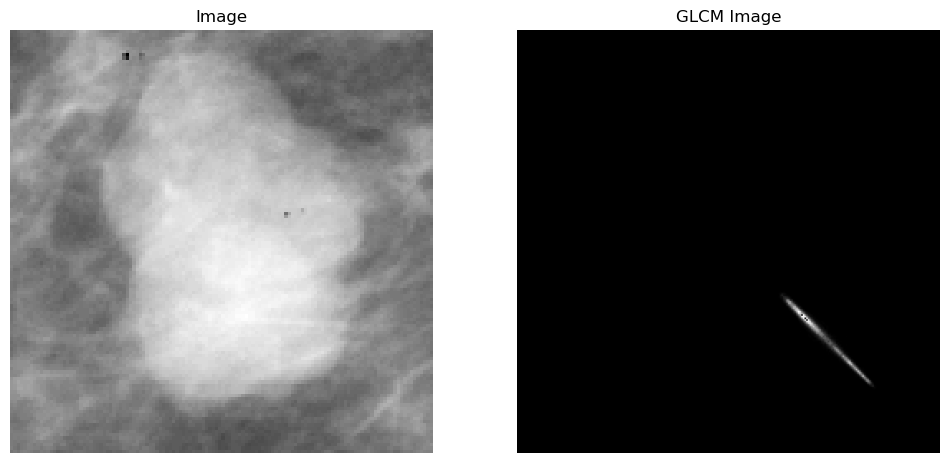

In [8]:
# try it on original.png image
img = io.imread("original.png")
glcm_img = construct_glcm(img, 256, 1, 0, symmetric=True, normalized=True)

plt.figure(figsize=(12, 6))

# First image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Image")
plt.axis('off')

# Second image
plt.subplot(1, 2, 2)
plt.imshow(glcm_img, cmap='gray')
plt.title("GLCM Image")
plt.axis('off')

plt.show()

In [9]:
print("Energy: ", energy(glcm_img), "\nIDM: ", IDM(glcm_img), "\nCorrelation: ", correlation(glcm_img), "\nContrast: ", contrast(glcm_img), "\nEntropy: ", entropy(glcm_img) ) 

Energy:  0.003662387240565654 
IDM:  0.4908427592393157 
Correlation:  0.9904941804573262 
Contrast:  3.7795488911290263 
Entropy:  5.854231402513337
